## 0. Standard Libraries Needed

What will be covered:
1. Scikit-Learn workflow
2. Getting the data ready
3. Choose the right estimator/algorithm for our problems
4. Fir the model.algo and use it to make predictions on our data
5. Evaluate the model
6. Improve the model
7. Save and load a trained model
8. Put it all together

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 1. Get the data ready

In [2]:
heart_disease = pd.read_csv("../matplotlib/heart-disease (1).csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Create X (features matrix)
X = heart_disease.drop("target",axis=1)

# Create Y (labels)
Y = heart_disease["target"]


## 2. Choose the right model and hyperparameters

In [4]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
# We'll keep the default hyper parameters
clf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 3. Fit the model to the data

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test,Y_train, Y_test, = train_test_split(X,Y,test_size=0.2) # 80% of the data will be used for training, 20% for testing


In [6]:
clf.fit(X_train, Y_train);

In [7]:
# make a prediction

y_preds = clf.predict(X_test)
y_preds

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

## 4. Evaluate the model on the training data and the test data

In [8]:

clf.score(X_train, Y_train)

1.0

In [9]:
clf.score(X_test, Y_test)

0.8360655737704918

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       0.85      0.71      0.77        24
           1       0.83      0.92      0.87        37

    accuracy                           0.84        61
   macro avg       0.84      0.81      0.82        61
weighted avg       0.84      0.84      0.83        61



In [11]:
confusion_matrix(Y_test,y_preds)

array([[17,  7],
       [ 3, 34]], dtype=int64)

In [12]:
accuracy_score(Y_test,y_preds)

0.8360655737704918

## 5. Improve a model

In [13]:

# Try different amount of n_estimators

np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i}, estimators")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train,Y_train)
    print(f"Model accurancy on the test set: {clf.score(X_test,Y_test)*100:.2f}")


Trying model with 10, estimators
Model accurancy on the test set: 81.97
Trying model with 20, estimators
Model accurancy on the test set: 81.97
Trying model with 30, estimators
Model accurancy on the test set: 83.61
Trying model with 40, estimators
Model accurancy on the test set: 85.25
Trying model with 50, estimators
Model accurancy on the test set: 85.25
Trying model with 60, estimators
Model accurancy on the test set: 83.61
Trying model with 70, estimators
Model accurancy on the test set: 81.97
Trying model with 80, estimators
Model accurancy on the test set: 81.97
Trying model with 90, estimators
Model accurancy on the test set: 85.25


## 6. Save a model and load it

In [14]:
import pickle

pickle.dump(clf,open("Random_forest_model_1.pkl", "wb"))

In [15]:
loaded_model = pickle.load(open("Random_forest_model_1.pkl","rb"))


In [16]:
loaded_model.score(X_test,Y_test)

0.8524590163934426

# Detailed Steps by Steps

## 1. Getting our data ready to be used with ML

There are three main things we need to do:
    1. Split the data into features and labels (usually X & Y)
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values to numerical (feature encoding)

In [17]:
heart_disease


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [18]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [19]:
y = heart_disease["target"]

In [20]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### Cleaning data
Clean data -> Transform Data -> Reduce Data

Clean data = remove outliers / NAN values
Transform data = convert string to numbers, convert color to numbers, yes or no is boolean, make sure the data is using the same metric system
Reduce Data = more data, more cpu, reduce until we get the same result with either amount of data

### 1.1 Make sure it's all numerical

In [22]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [23]:
len(car_sales)

1000

In [24]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [43]:
# Split data into X and y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into trainig

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [44]:
# Build machine learning model
# use regressor for predicting number
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()


In [45]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Why doors?
##  It's numerical, but also categorical so we treat it as categorical
categorical_features = ["Make","Colour","Doors"]
# one for true in a category, 0 for the rest
one_hot = OneHotEncoder()

# transform the given cat. columns, and pass through - don't touch the remaining columns
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")

# transform the X values to numbers
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [46]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [47]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,y,train_size=0.2)

model.fit(X_train,y_train);

In [48]:
# model hasn't really been able to find good patterns
model.score(X_test,y_test)

0.26160452087764263

### What if there were missing values
1. Fill it with some value(aka imputation)
2. Remove the samples with missing data altogether

In [49]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [50]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [51]:
## Make data
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

## Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2)

## pick model
model = RandomForestRegressor()
## get the model to learn and find pattern
# model.fit(X_train,y_train)
## test how well it's learnt
# model.score(X_test,y_test)

In [67]:
## determine the categorical features
categorical_features = ["Make","Colour","Doors"]

## create one hot encoder
one_hot = OneHotEncoder()

## create column transformer
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)], remainder="passthrough")

## fit the transformer to X
transformed_X = transformer.fit_transform(X)

## refit for the model

np.random.seed(52)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, train_size=0.2)
# model.fit(X_train,y_train)
# model.score(X_test,y_test)



### Option 1: Fill missing data with Pandas

In [68]:
## Fill the Make column
car_sales_missing["Make"].fillna("missing",inplace=True)

## Fill the Colour column
car_sales_missing["Colour"].fillna("missing",inplace=True)

## Fill the Ode column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)

## Fill the Doors column - category
car_sales_missing["Doors"].fillna(4, inplace=True)

## Remove price with missing price value, its bad to predict based on missing lables
car_sales_missing.dropna(inplace=True)


len(car_sales_missing)


950

In [69]:
## Make data
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

## determine the categorical features
categorical_features = ["Make","Colour","Doors"]

## create one hot encoder
one_hot = OneHotEncoder()

## create column transformer
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)], remainder="passthrough")

## fit the transformer to X
transformed_X = transformer.fit_transform(X)

## refit for the model

np.random.seed(52)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, train_size=0.2)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.09962060026835318

In [70]:
len(car_sales_missing)

950

### Option 2: Fill missing values with Sickit-Learn

## Important:
Fill the training and testing data seperately no matter the technique used to fill the data

In [71]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [72]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [73]:
# Split into X and Y

X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [74]:
# Fill missing valys with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with missing, and numerical with mean
# if strategy is constant, we need to suggest the fill value
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define Columns
cat_features = ["Make","Colour"]
door_feature = ["Doors"]
num_feature = ["Odometer (KM)"]

# Create an imputer (something that goes in and fills the missing data accordingly)
# the tuples are the tranformations we want it to make, params are : name of imputer, imputer, imputee
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer,cat_features),
    ("door_imputer", door_imputer,door_feature),
    ("num_imputer",num_imputer,num_feature)
])

# Transform the data

filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [75]:
car_sales_filled = pd.DataFrame(filled_X,columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [76]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Why doors?
##  It's numerical, but also categorical so we treat it as categorical
categorical_features = ["Make","Colour","Doors"]
# one for true in a category, 0 for the rest
one_hot = OneHotEncoder()

# transform the given cat. columns, and pass through - don't touch the remaining columns
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")

# transform the X values to numbers
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [77]:
# Now we've got the data as numbers and filled the missing values
# Lets fit the model

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transformed_X,y,train_size=0.2)

model = RandomForestRegressor(n_estimators=1000)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.19202325589865898

## 2. Choosing the right
Some things to note:
* Sklearn refers to ml models, algorithms as estimators.
* Classification problem - predicting a category (heart diseases or not)
    * Sometimes we'll see `clf` (short for classifier) used as a classification estimator
* Regression problem - predict a number (car price)

### 2.1 picking a ml model for a regression problem


In [78]:
# Get california Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [79]:
housing_df = pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [82]:
housing_df["target"] = housing['target']
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [83]:
# Import algorithm
from sklearn.linear_model import Ridge

# Set up random seed

np.random.seed(42)

#Ceate data
X = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price is 100ks

# split into train and test sets

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model
model = Ridge()

model.fit(X_train,y_train)

model.score(X_test,y_test)

0.5758549611440127

### 2.2 Ensemble Model
Ensemble = combination of smaller models to try and make beter predictions than just a single model,
Most famous = Random forest


In [84]:
# Import the RandomForest model
from sklearn.ensemble import  RandomForestRegressor

# Set up random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y= housing_df["target"]


# split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

# Create model
model = RandomForestRegressor()
model.fit(X_train,y_train)

# check score
model.score(X_test,y_test)


0.8065734772187598

### 2.3 Estimator for classification problem

In [85]:
heart_disease = pd.read_csv("../matplotlib/heart-disease (1).csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [86]:
# Import the LinearSVC estimator class

from sklearn.svm import LinearSVC

# Set up random seed
np.random.seed(42)

# data

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# split
X_test,X_train, y_test,y_train = train_test_split(X,y,test_size=0.2)

# Instantiate model
clf = LinearSVC()
clf.fit(X_train,y_train)

# Evaluate the linear SVC
clf.score(X_test,y_test)

C:\Users\setar\PycharmProjects\machine-learning-101\venv\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.5867768595041323

### 2.3 Ensemble - Classifier

In [87]:
from sklearn.ensemble import RandomForestClassifier
# Set up random seed
np.random.seed(42)

# data

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# split
X_test,X_train, y_test,y_train = train_test_split(X,y,test_size=0.2)

# Instantiate model
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

# Evaluate the linear SVC
clf.score(X_test,y_test)

0.7892561983471075

1. structured data = use ensemble methods
2. unstructured data = use deep learning or transfer learning

## 3. Fit the model/algo on data and use it to make predictions

### 3.1 Fititng the model to the data

X = features, fetaure variables


In [88]:
from sklearn.ensemble import RandomForestClassifier
# Set up random seed
np.random.seed(42)

# data

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# split
X_test,X_train, y_test,y_train = train_test_split(X,y,test_size=0.2)

# Instantiate model
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

# Evaluate the linear SVC
clf.score(X_test,y_test)

0.7892561983471075

In [89]:
X.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


### 3.2 Making predictions using a a machine learning model

2 ways:
1. predict() function
2. predict_proba()

In [90]:
# Use a trained model to make predictions

clf

RandomForestClassifier()

In [91]:
X_test.shape

(242, 13)

In [92]:
clf.predict(X_test)

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1],
      dtype=int64)

In [93]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [94]:
y_test

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [95]:
clf.predict(X_test)

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1],
      dtype=int64)

In [96]:
np.array(y_test)

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1],
      dtype=int64)

In [97]:
# Compare predicitons to truth labels to evaluate the model

y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)



0.7892561983471075

In [98]:
clf.score(X_test,y_test)

0.7892561983471075

In [99]:
## They're the same thing because we used X_test to make the prediction which makes sense

In [100]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_preds)

0.7892561983471075

### 3.3 Make predictions with predict_proba()

In [101]:
# predict_proba() returns the possibilities of a classification label
clf.predict_proba(X_test[:5])

array([[0.07, 0.93],
       [0.81, 0.19],
       [0.21, 0.79],
       [0.19, 0.81],
       [0.7 , 0.3 ]])

In [102]:
# Let's predict on the same data

clf.predict(X_test[:5])

array([1, 0, 1, 1, 0], dtype=int64)

In [103]:
## We're seeing the probability that we'd get 1 or 0. The 2 values in the array give probability the value would be 0 and the probability it would be 1.

## `predict()` can also be used for regression

In [104]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [105]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = housing_df.drop("target",axis=1)
y = housing_df["target"]

# Split the data
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.2)

# model instance
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)

# Make predictions
y_preds = model.predict(X_test)

In [106]:
y_preds

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [107]:
np.array(y_test)

array([0.477  , 0.458  , 5.00001, ..., 5.00001, 0.723  , 1.515  ])

In [108]:
# Compare the predicitons to truth
from sklearn.metrics import mean_absolute_error

# on avrg each one of our model's predictions is +- 0.32 off
mean_absolute_error(y_test,y_preds)

0.32659871732073664

In [109]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

## 4. Evaluating the ML model

Three ways to evaluate Scikit-learn models:
1. Estimator's builtin `score()` method
2. The `scoring` parameter
3. Problem-specific metric functions (one for classification & regression)


### 4.1 Evaluating a model with the `score()` method

In [110]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X and y
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# split
X_test,X_train, y_test,y_train = train_test_split(X,y,test_size=0.2)

# Instantiate model
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

# The highest value for score() is 1.0, lowest is 0.0
clf.score(X_train,y_train)


# Evaluate the linear SVC
clf.score(X_test,y_test)

0.7892561983471075

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

#### Accuracy

In [117]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

cross_val_score = cross_val_score(clf,X,y,cv=5);
cross_val_score

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [116]:
np.mean(cross_val_score)

0.8248087431693989

In [119]:
# Given a random sample our model hasn't seen, there's a 82% chance target will be predicted correctly, based on the trained data
print(f"Heart disease classifier Cross Validator Accuracy: {np.mean(cross_val_score)}")

Heart disease classifier Cross Validator Accuracy: 0.8248087431693989


#### Area Under the Reciver Operatring Characteristic Curve (AUC/ROC)

* Area under curve (AUC): comparison of model's true positive rate (tpr) vs a model's false positive rate (fpr)
    * TPR: Model predicts 1 when truth is 1
    * FPR: Model predicts 1 when truth is 0
    * True Negative: Model predicts 0 when truth is 0
    * False negative: Model predicts 0 when truth is 1
* ROC Curve

In [120]:
from sklearn.metrics import roc_curve

# Create split data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# fit the classifier
clf.fit(X_train, y_train)
# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

# want we want is TPR and FPR
y_probs_positive = y_probs[:, 1] # only column 1 of every row
y_probs_positive[:10]


array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [121]:
# Calculate fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# check the fpr
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

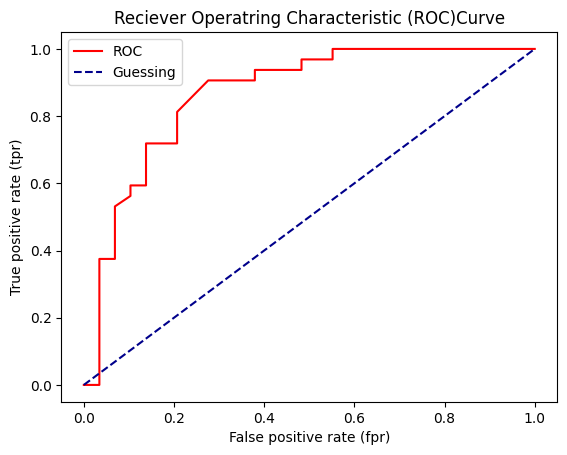

In [122]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curce given the fpr and tpr of a model
    """
    # plot roc roc_curve
    plt.plot(fpr,tpr,color="red", label="ROC")
    # plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1],color="darkblue", linestyle="--", label = "Guessing")

    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Reciever Operatring Characteristic (ROC)Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)

In [123]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

Perfect ROC AUC = 1.0, meaning every single prediction was accurately predicted

### Confusion Matrix

Quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

Gives an idea where the model is getting confused


In [124]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [125]:
# Visualize confusion matric with pd.crosstab()

pd.crosstab(y_test, y_preds, rownames=["Actual Label"]
            , colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,23,6
1,6,26


In [127]:
23+12+26

61

In [128]:
len(y_preds)

61

<Axes: >

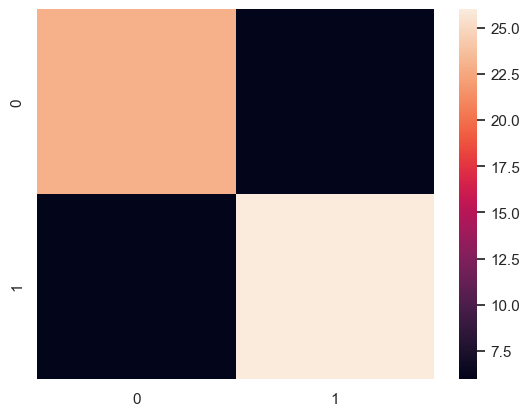

In [136]:
# the model is getting confused at the diagnol (we can see fpr, and tpr)

# Make our confusion matric more visual with Seaborn's heat map
import seaborn as sns

# Set the font scale
# sns.set(font_scale = 1)
sns.set_theme(context="notebook")
# create confusion matric
conf_mat = confusion_matrix(y_test,y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat)

### Creating a confusion matric using Scikit

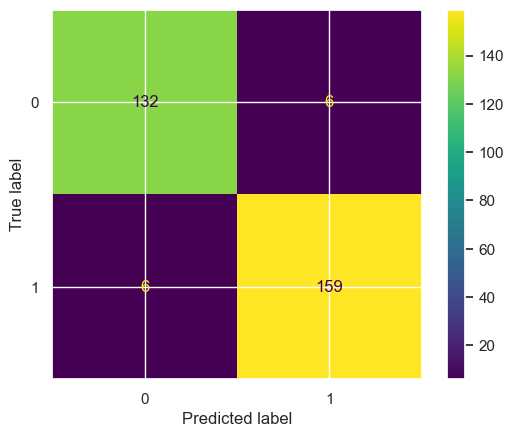

In [137]:
from sklearn.metrics import ConfusionMatrixDisplay
 # No need for previous preds, does the prediction and plot
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

In [138]:
len(X)

303

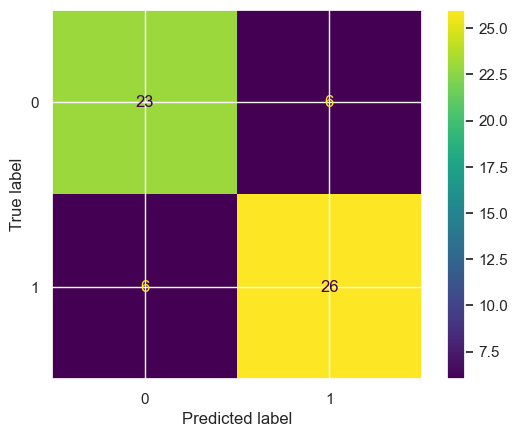

In [141]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds);

### Classification model

In [143]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61

